<a href="https://colab.research.google.com/github/rcarasek/Python-for-Investment/blob/main/PyForInvest_Colab_aula06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# CONFIGURANDO YAHOO FINANCE
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

     |████████████████████████████████| 6.3MB 7.9MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=7aeb6c227e6ddd6fd175d66d6a0f427a369b6461a9992539318550158e1406d9
  Stored in directory: /tmp/pip-ephem-wheel-cache-h_qa6u2_/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import random


In [6]:
tickers_ibov = "ABEV3.SA AZUL4.SA B3SA3.SA BBAS3.SA BBDC3.SA BBDC4.SA BBSE3.SA BPAC11.SA BRAP4.SA BRDT3.SA BRFS3.SA BRKM5.SA BRML3.SA BTOW3.SA CCRO3.SA CIEL3.SA CMIG4.SA COGN3.SA CRFB3.SA CSAN3.SA CSNA3.SA CVCB3.SA CYRE3.SA ECOR3.SA EGIE3.SA ELET3.SA ELET6.SA EMBR3.SA ENBR3.SA EQTL3.SA FLRY3.SA GGBR4.SA GNDI3.SA GOAU4.SA GOLL4.SA HAPV3.SA HGTX3.SA HYPE3.SA IGTA3.SA IRBR3.SA ITSA4.SA ITUB4.SA JBSS3.SA KLBN11.SA LAME4.SA LREN3.SA MGLU3.SA MRFG3.SA MRVE3.SA MULT3.SA NTCO3.SA PCAR4.SA PETR3.SA PETR4.SA QUAL3.SA RADL3.SA RAIL3.SA RENT3.SA SANB11.SA SBSP3.SA SMLS3.SA SULA11.SA SUZB3.SA TAEE11.SA TIMP3.SA TOTS3.SA UGPA3.SA USIM5.SA VALE3.SA VIVT4.SA VVAR3.SA WEGE3.SA YDUQ3.SA"

dados_yahoo = yf.download(tickers=tickers_ibov, period='1y')['Adj Close']

ibov = yf.download('BOVA11.SA', period='1y')["Adj Close"]
ibov = ibov / ibov.iloc[0]

[*********************100%***********************]  73 of 73 completed

3 Failed downloads:
- VIVT4.SA: No data found, symbol may be delisted
- PCAR4.SA: No data found, symbol may be delisted
- TIMP3.SA: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed


In [9]:
dados_yahoo.dropna(how='all', inplace=True)
dados_yahoo.dropna(axis=1, inplace=True, thresh=246)

In [10]:
dados_yahoo

,ABEV3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BPAC11.SA,BRAP4.SA,BRDT3.SA,BRFS3.SA,BRKM5.SA,BRML3.SA,BTOW3.SA,CCRO3.SA,CIEL3.SA,CMIG4.SA,COGN3.SA,CRFB3.SA,CSAN3.SA,CSNA3.SA,CVCB3.SA,CYRE3.SA,ECOR3.SA,EGIE3.SA,ELET3.SA,ELET6.SA,EMBR3.SA,ENBR3.SA,EQTL3.SA,FLRY3.SA,GGBR4.SA,GNDI3.SA,GOAU4.SA,GOLL4.SA,HAPV3.SA,HGTX3.SA,HYPE3.SA,IGTA3.SA,IRBR3.SA,ITSA4.SA,ITUB4.SA,JBSS3.SA,KLBN11.SA,LAME4.SA,LREN3.SA,MGLU3.SA,MRFG3.SA,MRVE3.SA,MULT3.SA,NTCO3.SA,PETR3.SA,PETR4.SA,QUAL3.SA,RADL3.SA,RAIL3.SA,RENT3.SA,SANB11.SA,SBSP3.SA,SMLS3.SA,SULA11.SA,SUZB3.SA,TAEE11.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VVAR3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-05-05,11.577252,15.160000,37.281567,26.560125,14.909522,17.852589,23.745760,40.731487,26.274302,18.177744,18.340000,20.680000,9.10,74.607750,12.233897,3.812654,8.083880,4.96,18.961128,14.033064,7.845737,11.657994,13.385239,10.50,37.635345,20.374548,23.164055,7.50,15.998834,17.192719,20.914383,11.316041,54.508190,5.030631,11.780000,10.336375,13.447811,26.985077,30.302305,8.113666,8.639458,22.195719,22.028198,18.700001,25.267529,36.021317,12.464321,12.361034,14.013369,19.320732,34.517307,17.873848,17.355528,24.058195,20.720726,19.650000,33.398312,24.330751,41.312328,8.328801,39.064640,41.599998,23.894554,20.086498,14.101876,4.583467,40.138306,9.70,19.336782,28.386959
2020-05-06,11.470595,14.770000,36.992855,25.786249,14.564437,17.481880,23.383375,38.965698,26.633465,17.773796,18.309999,20.100000,8.74,88.879501,12.028367,3.715144,7.708090,4.98,18.980219,13.829121,7.983727,10.971123,12.934557,10.46,37.500000,20.062464,22.863453,7.16,15.979844,16.672304,20.992132,11.443851,54.069729,5.089355,11.520000,10.398114,13.050004,26.859701,29.483591,8.230734,8.435834,21.745939,22.337908,18.580000,27.127472,35.307831,13.693372,12.548923,13.860425,18.938046,36.497154,17.174980,16.717030,23.959068,20.603302,20.139999,32.276089,24.108154,40.133389,8.216754,39.650875,41.869999,23.851343,19.511747,13.730517,4.563582,40.716957,10.01,19.247561,27.599525
2020-05-07,11.189405,13.660000,35.462715,25.088808,14.086625,16.730707,22.401121,36.805321,27.333376,16.708839,18.410000,20.440001,8.14,89.896065,11.176888,3.510373,7.236166,4.71,18.731989,13.370824,8.377303,10.256024,12.024180,9.76,35.769531,19.081633,21.510742,7.01,15.163286,15.801785,20.389578,12.240200,56.291912,5.422120,10.750000,10.607232,12.322309,27.081524,27.283913,7.663406,8.038283,20.963713,23.605787,20.459999,26.514086,33.008804,14.100573,13.468583,13.325126,18.094175,36.447159,17.519627,16.871819,23.344477,20.637136,19.650000,29.564905,23.140345,39.083244,7.650296,39.055759,45.009998,23.354918,18.045145,12.997572,4.712719,42.296768,9.74,19.376436,26.359320
2020-05-08,11.674215,13.600000,36.338455,25.891342,14.714859,17.481880,22.191319,36.913830,29.644924,17.489195,18.740000,20.379999,8.18,87.205162,11.176888,3.666389,7.542042,4.73,18.856104,14.273670,8.397038,11.187534,12.258534,9.78,36.958622,19.812798,22.456753,7.54,15.267730,16.653376,20.078585,12.780931,55.494717,5.705950,11.000000,10.077468,12.079743,27.100813,28.329500,8.140681,8.232211,21.824160,22.696012,21.490000,26.613020,33.593475,13.790206,13.102696,13.219978,18.486673,35.697216,18.716322,17.877934,22.700151,20.834175,20.299999,29.445730,23.882126,40.618835,7.575599,38.558346,47.349998,23.528883,18.332520,13.564383,4.782316,44.868561,8.85,18.955103,26.615234
2020-05-11,11.577252,13.150000,35.414600,26.053761,14.458255,17.218481,22.458338,36.578434,29.414692,16.442595,20.850000,22.080000,7.95,86.647049,11.000719,3.549376,7.253644,4.52,18.502850,13.934530,7.913543,10.500663,11.888976,9.66,36.465584,19.402630,21.837870,7.19,14.726522,16.927778,19.301100,12.289357,53.581451,5.519992,10.540000,9.822544,11.507290,27.110460,27.343096,6.933987,8.164334,21.882830,22.415337,21.660000,25.989738,32.404320,13.643713,13.597138,13.200862,18.035299,34.147335,18.218498,17.558685,21.540361,20.897863,19.969999,27.906408,24.136295,41.332142,

In [11]:
retorno = dados_yahoo.pct_change()
retorno

,ABEV3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BPAC11.SA,BRAP4.SA,BRDT3.SA,BRFS3.SA,BRKM5.SA,BRML3.SA,BTOW3.SA,CCRO3.SA,CIEL3.SA,CMIG4.SA,COGN3.SA,CRFB3.SA,CSAN3.SA,CSNA3.SA,CVCB3.SA,CYRE3.SA,ECOR3.SA,EGIE3.SA,ELET3.SA,ELET6.SA,EMBR3.SA,ENBR3.SA,EQTL3.SA,FLRY3.SA,GGBR4.SA,GNDI3.SA,GOAU4.SA,GOLL4.SA,HAPV3.SA,HGTX3.SA,HYPE3.SA,IGTA3.SA,IRBR3.SA,ITSA4.SA,ITUB4.SA,JBSS3.SA,KLBN11.SA,LAME4.SA,LREN3.SA,MGLU3.SA,MRFG3.SA,MRVE3.SA,MULT3.SA,NTCO3.SA,PETR3.SA,PETR4.SA,QUAL3.SA,RADL3.SA,RAIL3.SA,RENT3.SA,SANB11.SA,SBSP3.SA,SMLS3.SA,SULA11.SA,SUZB3.SA,TAEE11.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VVAR3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-05-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-06,-0.009213,-0.025726,-0.007744,-0.029137,-0.023145,-0.020765,-0.015261,-0.043352,0.013670,-0.022222,-0.001636,-0.028046,-0.039561,0.191290,-0.016800,-0.025575,-0.046486,0.004032,0.001007,-0.014533,0.017588,-0.058918,-0.033670,-0.003810,-0.003596,-0.015317,-0.012977,-0.045333,-0.001187,-0.030269,0.003718,0.011295,-0.008044,0.011673,-0.022071,0.005973,-0.029582,-0.004646,-0.027018,0.014429,-0.023569,-0.020264,0.014060,-0.006417,0.073610,-0.019807,0.098606,0.015200,-0.010914,-0.019807,0.057358,-0.039100,-0.036789,-0.004120,-0.005667,0.024936,-0.033601,-0.009149,-0.028537,-0.013453,0.015007,0.006490,-0.001808,-0.028614,-0.026334,-0.004338,0.014416,0.031959,-0.004614,-0.027739
2020-05-07,-0.024514,-0.075152,-0.041363,-0.027047,-0.032807,-0.042969,-0.042007,-0.055443,0.026279,-0.059917,0.005462,0.016915,-0.068650,0.011438,-0.070789,-0.055118,-0.061225,-0.054217,-0.013078,-0.033140,0.049297,-0.065180,-0.070383,-0.066922,-0.046146,-0.048889,-0.059165,-0.020950,-0.051099,-0.052214,-0.028704,0.069588,0.041098,0.065385,-0.066840,0.020111,-0.055762,0.008259,-0.074607,-0.068928,-0.047126,-0.035971,0.056759,0.101184,-0.022611,-0.065114,0.029737,0.073286,-0.038621,-0.044560,-0.001370,0.020067,0.009259,-0.025652,0.001642,-0.024330,-0.084000,-0.040144,-0.026166,-0.068939,-0.015009,0.074994,-0.020813,-0.075165,-0.053381,0.032680,0.038800,-0.026973,0.006696,-0.044936
2020-05-08,0.043328,-0.004392,0.024695,0.031988,0.044598,0.044898,-0.009366,0.002948,0.084569,0.046703,0.017925,-0.002935,0.004914,-0.029933,0.000000,0.044444,0.042271,0.004246,0.006626,0.067524,0.002356,0.090826,0.019490,0.002049,0.033243,0.038318,0.043979,0.075606,0.006888,0.053892,-0.015253,0.044177,-0.014162,0.052347,0.023256,-0.049944,-0.019685,0.000712,0.038322,0.062280,0.024126,0.041045,-0.038540,0.050342,0.003731,0.017713,-0.022011,-0.027166,-0.007891,0.021692,-0.020576,0.068306,0.059633,-0.027601,0.009548,0.033079,-0.004031,0.032056,0.039290,-0.009764,-0.012736,0.051988,0.007449,0.015925,0.043609,0.014768,0.060804,-0.091376,-0.021745,0.009709
2020-05-11,-0.008306,-0.033088,-0.025424,0.006273,-0.017438,-0.015067,0.012033,-0.009086,-0.007766,-0.059843,0.112593,0.083415,-0.028117,-0.006400,-0.015762,-0.031915,-0.038239,-0.044397,-0.018734,-0.023760,-0.057579,-0.061396,-0.030147,-0.012270,-0.013340,-0.020702,-0.027559,-0.046419,-0.035448,0.016477,-0.038722,-0.038462,-0.034477,-0.032590,-0.041818,-0.025296,-0.047390,0.000356,-0.034819,-0.148230,-0.008245,0.002688,-0.012367,0.007911,-0.023420,-0.035398,-0.010623,0.037736,-0.001446,-0.024416,-0.043417,-0.026598,-0.017857,-0.051092,0.003057,-0.016256,-0.052277,0.010643,0.017561,-0.050123,-0.035936,0.005280,-0.016636,-0.028649,-0.033862,-0.010395,-0.022927,0.003390,0.015429,-0.045488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [14]:
retorno_acumulado = (1 + retorno).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado

,ABEV3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BPAC11.SA,BRAP4.SA,BRDT3.SA,BRFS3.SA,BRKM5.SA,BRML3.SA,BTOW3.SA,CCRO3.SA,CIEL3.SA,CMIG4.SA,COGN3.SA,CRFB3.SA,CSAN3.SA,CSNA3.SA,CVCB3.SA,CYRE3.SA,ECOR3.SA,EGIE3.SA,ELET3.SA,ELET6.SA,EMBR3.SA,ENBR3.SA,EQTL3.SA,FLRY3.SA,GGBR4.SA,GNDI3.SA,GOAU4.SA,GOLL4.SA,HAPV3.SA,HGTX3.SA,HYPE3.SA,IGTA3.SA,IRBR3.SA,ITSA4.SA,ITUB4.SA,JBSS3.SA,KLBN11.SA,LAME4.SA,LREN3.SA,MGLU3.SA,MRFG3.SA,MRVE3.SA,MULT3.SA,NTCO3.SA,PETR3.SA,PETR4.SA,QUAL3.SA,RADL3.SA,RAIL3.SA,RENT3.SA,SANB11.SA,SBSP3.SA,SMLS3.SA,SULA11.SA,SUZB3.SA,TAEE11.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VVAR3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-05-05,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2020-05-06,0.990787,0.974274,0.992256,0.970863,0.976855,0.979235,0.984739,0.956648,1.013670,0.977778,0.998364,0.971954,0.960439,1.191290,0.983200,0.974425,0.953514,1.004032,1.001007,0.985467,1.017588,0.941082,0.966330,0.996190,0.996404,0.984683,0.987023,0.954667,0.998813,0.969731,1.003718,1.011295,0.991956,1.011673,0.977929,1.005973,0.970418,0.995354,0.972982,1.014429,0.976431,0.979736,1.014060,0.993583,1.073610,0.980193,1.098606,1.015200,0.989086,0.980193,1.057358,0.960900,0.963211,0.995880,0.994333,1.024936,0.966399,0.990851,0.971463,0.986547,1.015007,1.006490,0.998192,0.971386,0.973666,0.995662,1.014416,1.031959,0.995386,0.972261
2020-05-07,0.966499,0.901055,0.951213,0.944604,0.944807,0.937159,0.943374,0.903609,1.040308,0.919192,1.003817,0.988395,0.894505,1.204916,0.913600,0.920716,0.895135,0.949597,0.987915,0.952809,1.067752,0.879742,0.898316,0.929524,0.950424,0.936543,0.928626,0.934667,0.947774,0.919097,0.974907,1.081668,1.032724,1.077821,0.912564,1.026204,0.916306,1.003574,0.900391,0.944506,0.930415,0.944494,1.071617,1.094118,1.049334,0.916369,1.131275,1.089600,0.950887,0.936516,1.055910,0.980182,0.972129,0.970334,0.995966,1.000000,0.885222,0.951074,0.946043,0.918535,0.999773,1.081971,0.977416,0.898372,0.921691,1.028199,1.053776,1.004124,1.002051,0.928571
2020-05-08,1.008375,0.897098,0.974703,0.974820,0.986944,0.979235,0.934538,0.906273,1.128286,0.962121,1.021810,0.985493,0.898901,1.168849,0.913600,0.961637,0.932973,0.953629,0.994461,1.017146,1.070268,0.959645,0.915825,0.931429,0.982019,0.972429,0.969466,1.005333,0.954303,0.968630,0.960037,1.129453,1.018099,1.134241,0.933786,0.974952,0.898268,1.004289,0.934896,1.003330,0.952862,0.983260,1.030316,1.149198,1.053250,0.932600,1.106374,1.060000,0.943383,0.956831,1.034183,1.047134,1.030100,0.943552,1.005475,1.033079,0.881653,0.981561,0.983213,0.909567,0.987040,1.138221,0.984696,0.912679,0.961885,1.043384,1.117849,0.912371,0.980261,0.937587
2020-05-11,1.000000,0.867414,0.949923,0.980935,0.969733,0.964481,0.945783,0.898038,1.119523,0.904545,1.136859,1.067698,0.873626,1.161368,0.899200,0.930946,0.897297,0.911290,0.975831,0.992978,1.008642,0.900726,0.888215,0.920000,0.968919,0.952297,0.942748,0.958667,0.920475,0.984590,0.922863,1.086012,0.982998,1.097276,0.894737,0.950289,0.855700,1.004646,0.902344,0.854606,0.945005,0.985903,1.017575,1.158289,1.028583,0.899587,1.094621,1.100000,0.942019,0.933469,0.989282,1.019282,1.011706,0.895344,1.008549,1.016285,0.835563,0.992008,1.000480,0.863976,0.951569,1.144231,0.968315,0.886532,0.929314,1.032538,1.092220,0.915464,0.995386,0.894938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

###Resultados

In [15]:
carteira = random.sample(list(dados_yahoo.columns) , k=5)
carteira = 10000 * retorno_acumulado.loc[: , carteira]
carteira['saldo'] = carteira.sum(axis=1)
carteira["retorno"] = carteira['saldo'].pct_change()
carteira

,CCRO3.SA,QUAL3.SA,B3SA3.SA,GNDI3.SA,UGPA3.SA,saldo,retorno
Date,,,,,,,
2020-05-05,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,50000.000000,NaN
2020-05-06,9831.999433,9958.797069,9922.559170,9919.560473,9736.659956,49369.576100,-0.012608
2020-05-07,9135.999980,9703.336676,9512.131159,10327.239250,9216.909656,47895.616719,-0.029856
2020-05-08,9135.999980,9435.517226,9747.030100,10180.986836,9618.849509,48118.383652,0.004651
2020-05-11,8991.998937,8953.440315,9499.225377,9829.981745,9293.139348,46567.785722,-0.032225
...,...,...,...,...,...,...,...
2021-04-29,10160.294870,11214.473660,14095.437505,15100.482574,15104.372529,65675.061138,0.001601
2021-04-30,9841.508193,11243.569648,13813.797184,14909.685391,14969.639658,64778.200075,-0.013656
2021-05-03,10340.122532,11202.004404,13811.115344,15271.099192,15295.836738,65920.178210,0.017629


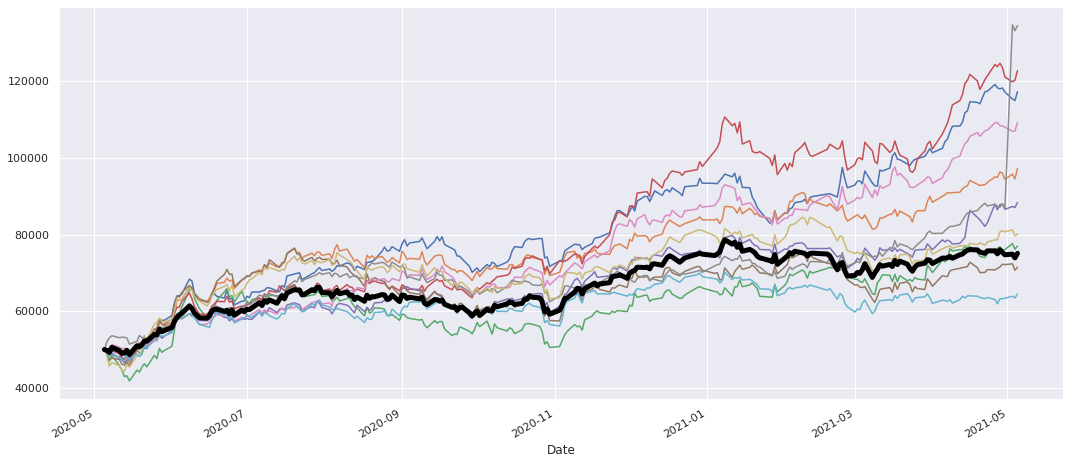

In [18]:
for i in range(10):
  carteira = random.sample(list(dados_yahoo.columns) , k=5)
  carteira = 10000 * retorno_acumulado.loc[: , carteira]
  carteira['saldo'] = carteira.sum(axis=1)
  carteira['saldo'].plot(figsize=(18,8))

(ibov*50000).plot(linewidth=5, color='black')